In [9]:
# Importing libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [10]:
# 1. Load dataset
iris = load_iris()
X = iris.data
y = iris.target

In [ ]:
# 2. Standardize data
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

In [12]:
# 3. Split data
X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.3, random_state=42, stratify=y)

In [13]:
# 4. Apply LDA
lda = LDA(n_components=2)
X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)

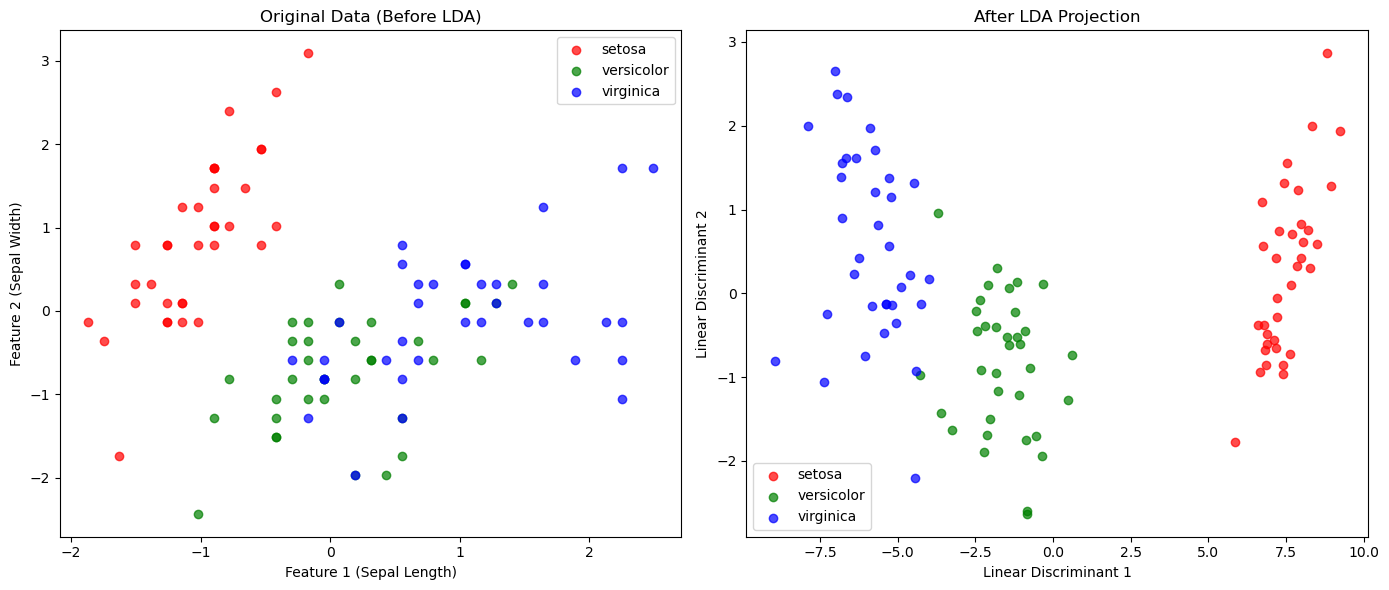

In [17]:
plt.figure(figsize=(14,6))

plt.subplot(1,2,1)
for label, color in zip(np.unique(y_train), ['red', 'green', 'blue']):
    plt.scatter(X_train[y_train==label, 0],
                X_train[y_train==label, 1],
                label=iris.target_names[label],
                alpha=0.7, color=color)
plt.xlabel('Feature 1 (Sepal Length)')
plt.ylabel('Feature 2 (Sepal Width)')
plt.title('Original Data (Before LDA)')
plt.legend()

# -------- Plot 2: LDA projection --------
plt.subplot(1,2,2)
for label, color in zip(np.unique(y_train), ['red', 'green', 'blue']):
    plt.scatter(X_train_lda[y_train==label, 0],
                X_train_lda[y_train==label, 1],
                label=iris.target_names[label],
                alpha=0.7, color=color)
plt.xlabel('Linear Discriminant 1')
plt.ylabel('Linear Discriminant 2')
plt.title('After LDA Projection')
plt.legend()

plt.tight_layout()
plt.show()

---

In [45]:
# Importing libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [46]:
# 1. Load dataset
iris = load_iris()
X = iris.data
y = iris.target

In [47]:
# 2. Standardize data
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [48]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [50]:
# Apply LDA
lda = LDA(n_components=2)
X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)

In [51]:
model = RandomForestClassifier(max_depth=3)
model.fit(X_train_lda, y_train)

RandomForestClassifier(max_depth=3)

In [52]:
model.predict(X_test_lda)

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

In [53]:
cm = confusion_matrix(model.predict(X_test_lda), y_test)
acc = accuracy_score(model.predict(X_test_lda),y_test)

In [54]:
print("Confusion Matrix:\n", cm)
print("Accuracy\n", acc)

Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Accuracy
 1.0
